In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import string
from collections import Counter, defaultdict
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from nltk.corpus import stopwords

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('wordnet')

plt.rcParams['font.family'] = 'DejaVu Sans'

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


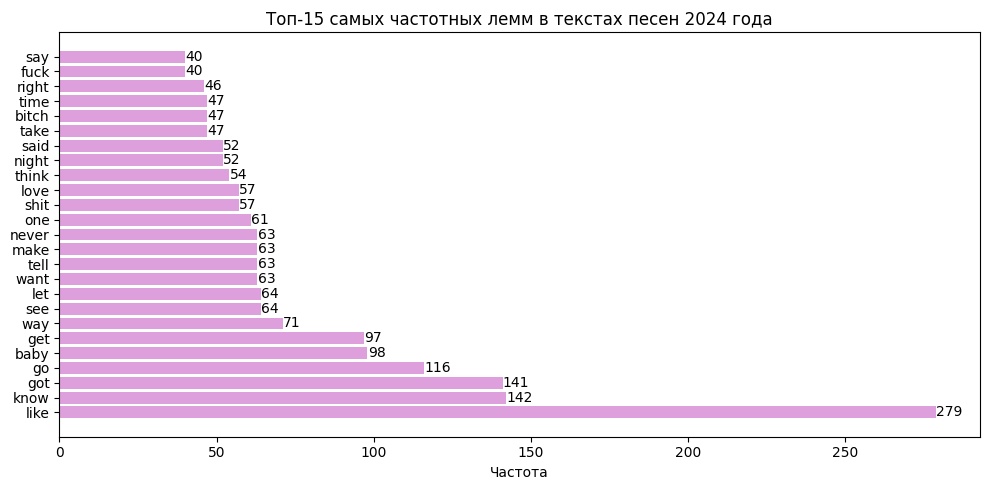

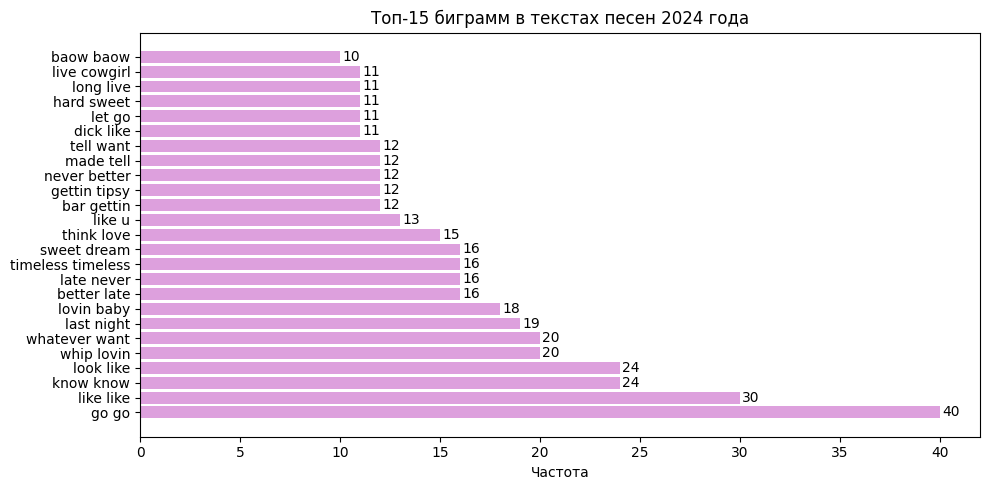

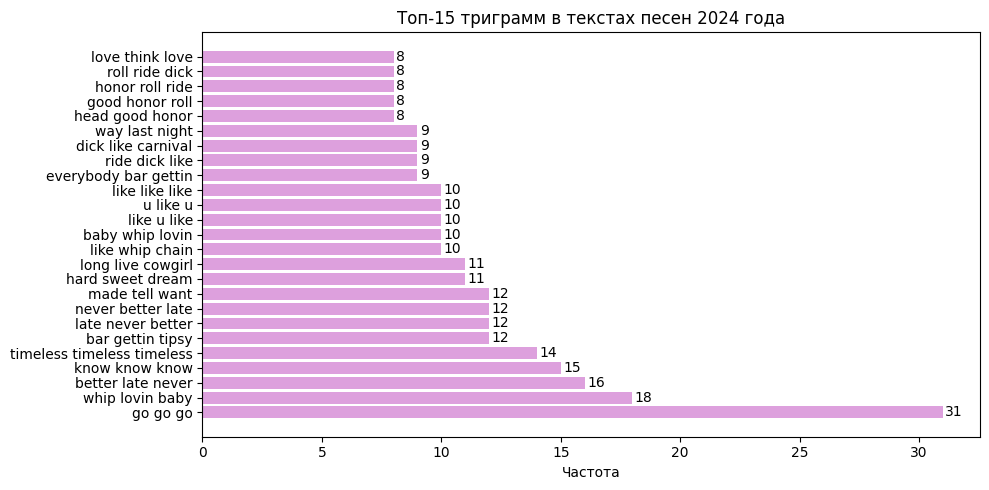

In [2]:

english_stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['huh','ozeba', "n", "wanna", "fe", "yeah", "oh", "uh", "woah",
                "nigga", "hey", "wan", "na", "homixide", "ta", "em", "niggas",
                "redrum", "still", "bout", "would","whoomp", "as", "anything",
                "ooh", "gon", "ya", "ooh"]
english_stopwords.extend(newStopWords)

lemmatizer_en = WordNetLemmatizer()


def preprocess_text(text, language='english'):

    text = text.lower()

    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    tokens = word_tokenize(text)

    clean_tokens = [t for t in tokens if t not in english_stopwords and len(t) > 1]


    lemmas = [lemmatizer_en.lemmatize(token) for token in clean_tokens]

    return lemmas, clean_tokens

def create_ngram_model(tokens, n=2):
    n_grams = list(ngrams(tokens, n))

    n_gram_counts = Counter(n_grams)

    context_counts = defaultdict(int)
    for n_gram in n_grams:
        context = n_gram[:-1]
        context_counts[context] += 1

    n_gram_model = {}
    for n_gram, count in n_gram_counts.items():
        context = n_gram[:-1]
        word = n_gram[-1]
        n_gram_model[n_gram] = count / context_counts[context]

    return n_gram_model, n_gram_counts, context_counts

def visualize_top_ngrams(n_gram_counts, n=25, title='Топ n-грамм'):

    top_n_grams = n_gram_counts.most_common(n)

    labels = [' '.join(n_gram) if isinstance(n_gram, tuple) else n_gram for n_gram, _ in top_n_grams]
    values = [count for _, count in top_n_grams]

    plt.figure(figsize=(10, 5))
    bars = plt.barh(labels, values, color='plum')
    plt.xlabel('Частота')
    plt.title(title)

    for bar in bars:
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
                 f'{int(bar.get_width())}', va='center')

    plt.tight_layout()
    plt.show()


try:
    with open('input_text.txt', 'r', encoding='utf-8') as f:
        text_for_analysis = f.read()
except FileNotFoundError:
    print("Ошибка: Файл 'input_text.txt' не найден. Пожалуйста, создайте его.")
    text_for_analysis = ""

if text_for_analysis:
    lemmatized_tokens, _ = preprocess_text(text_for_analysis, language='english')

    lemma_counts = Counter(lemmatized_tokens)
    visualize_top_ngrams(lemma_counts, title='Топ-15 самых частотных лемм в текстах песен 2024 года')

    english_bigram_model, english_bigram_counts, english_context_counts = create_ngram_model(lemmatized_tokens, 2)
    english_trigram_model, english_trigram_counts, english_trigram_context_counts = create_ngram_model(lemmatized_tokens, 3)

    visualize_top_ngrams(english_bigram_counts, title='Топ-15 биграмм в текстах песен 2024 года')
    visualize_top_ngrams(english_trigram_counts, title='Топ-15 триграмм в текстах песен 2024 года')
else:
    print("Анализ не выполнен, так как текст для анализа пуст или файл не найден.")

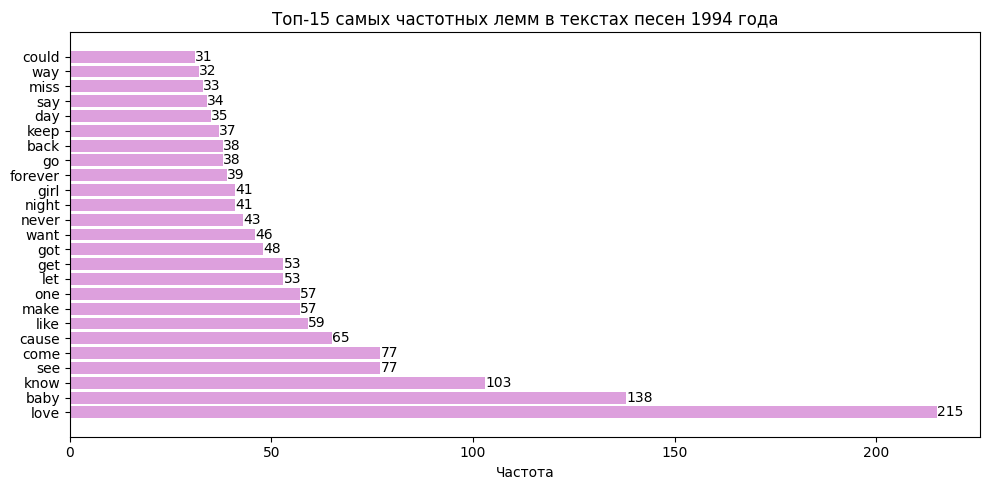

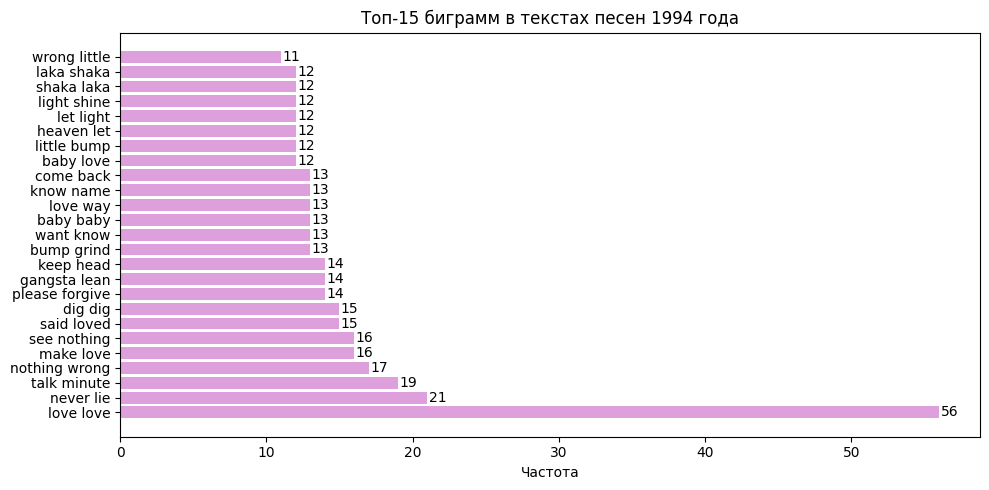

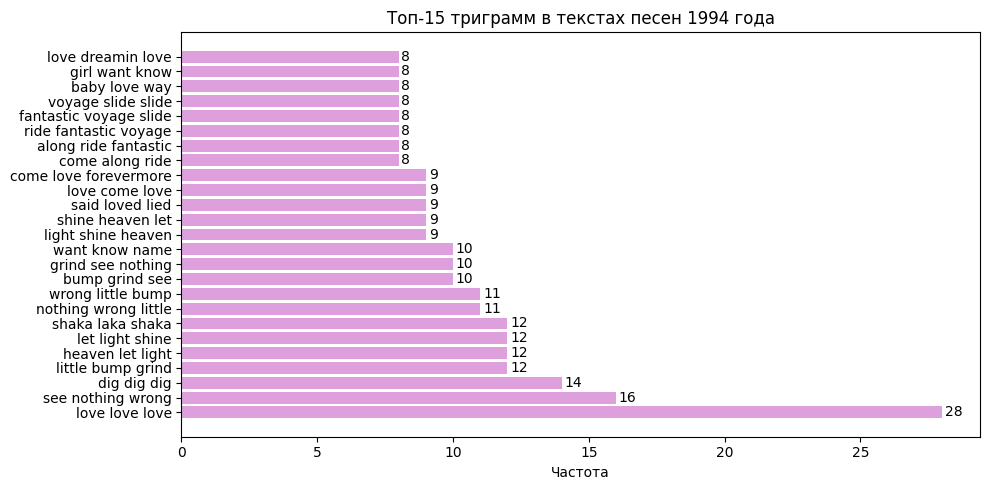

In [3]:
try:
    with open('input_text2.txt', 'r', encoding='utf-8') as f:
        text_for_analysis = f.read()
except FileNotFoundError:
    print("Ошибка: Файл не найден. Пожалуйста, создайте его.")
    text_for_analysis = ""

if text_for_analysis:
    lemmatized_tokens, _ = preprocess_text(text_for_analysis, language='english')

    lemma_counts = Counter(lemmatized_tokens)
    visualize_top_ngrams(lemma_counts, title='Топ-15 самых частотных лемм в текстах песен 1994 года')

    english_bigram_model, english_bigram_counts, english_context_counts = create_ngram_model(lemmatized_tokens, 2)
    english_trigram_model, english_trigram_counts, english_trigram_context_counts = create_ngram_model(lemmatized_tokens, 3)

    visualize_top_ngrams(english_bigram_counts, title='Топ-15 биграмм в текстах песен 1994 года')
    visualize_top_ngrams(english_trigram_counts, title='Топ-15 триграмм в текстах песен 1994 года')
else:
    print("Анализ не выполнен, так как текст для анализа пуст или файл не найден.")

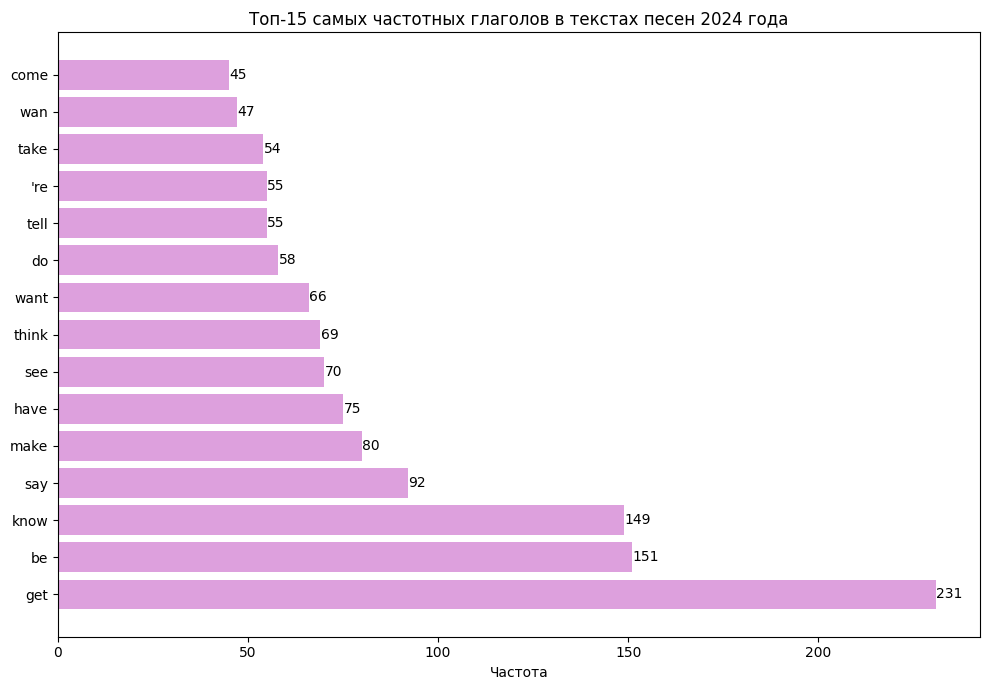

In [6]:
import nltk
from nltk import pos_tag, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from collections import Counter

nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)


english_stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['huh','ozeba', "n", "wanna", "fe", "yeah", "oh", "uh", "woah",
                "nigga", "hey", "wan", "na", "homixide", "ta", "get", "let", "got",
                "like", "come", "know", "see", "want", "make", "think", "tell",
                "go", "say", "em", "niggas", "redrum", "still", "bout", "would",
                "whoomp", "back", "keep", "take", "need", "said", "could",
                "might", "talk", "as", "feel", "anything", "ooh", "gon", "ya", "ooh", "ooh", "ooh",]
english_stopwords.extend(newStopWords)

lemmatizer_en = WordNetLemmatizer()


def preprocess_text(text, language='english'):

    text = text.lower()

    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    tokens = word_tokenize(text)

    clean_tokens = [t for t in tokens if t not in english_stopwords and len(t) > 1]


    lemmas = [lemmatizer_en.lemmatize(token) for token in clean_tokens]

    return lemmas, clean_tokens



def get_most_frequent_verbs(text, top_n=15, min_length=3):

    tokens = word_tokenize(text.lower())

    tagged = pos_tag(tokens)


    verb_tags = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}
    verbs = [word for word, tag in tagged if tag in verb_tags]

    lemmatizer = WordNetLemmatizer()
    verb_lemmas = []

    for verb in verbs:
        if len(verb) >= min_length:
            lemma = lemmatizer.lemmatize(verb, pos=wordnet.VERB)
            verb_lemmas.append(lemma)

    counter = Counter(verb_lemmas)

    return counter.most_common(top_n)


try:
    with open('input_text.txt', 'r', encoding='utf-8') as f:
        text_for_analysis = f.read()
except FileNotFoundError:
    print("Ошибка: Файл 'input_text.txt' не найден. Пожалуйста, создайте его.")
    text_for_analysis = ""

lemmatized_tokens, _ = preprocess_text(text_for_analysis, language='english')


most_frequent_verbs = get_most_frequent_verbs(text_for_analysis)

most_frequent_verbs_counter = Counter(dict(most_frequent_verbs))
visualize_top_ngrams(most_frequent_verbs_counter, title='Топ-15 самых частотных глаголов в текстах песен 2024 года')

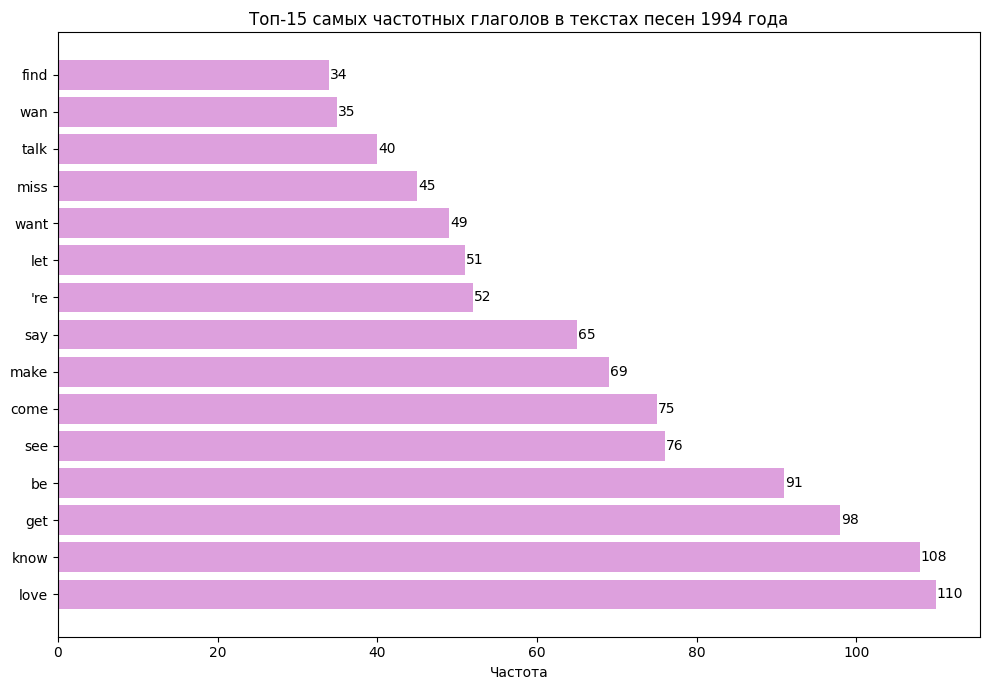

In [8]:

try:
    with open('input_text2.txt', 'r', encoding='utf-8') as f:
        text_for_analysis = f.read()
except FileNotFoundError:
    print("Ошибка: Файл 'input_text.txt' не найден. Пожалуйста, создайте его.")
    text_for_analysis = ""

lemmatized_tokens, _ = preprocess_text(text_for_analysis, language='english')

most_frequent_verbs = get_most_frequent_verbs(text_for_analysis)

most_frequent_verbs_counter = Counter(dict(most_frequent_verbs))
visualize_top_ngrams(most_frequent_verbs_counter, title='Топ-15 самых частотных глаголов в текстах песен 1994 года')

